# Аналіз та обробка великих даних

Ю.С. Процик. Курс лекцій

# Тема 5. Знайомство з Apache Hive

### План

1. [Що таке Hive](#1.-Що-таке-Hive)

2. [Архітектура Hive](#2.-Архітектура-Hive)    
    
3. [Hive Інтерфейс](#3.-Hive-Інтерфейс)  

4. [Концепція Hive](#4.-Концепція-Hive)   

5. [Hive: приклади](#5.-Hive:-приклади)

6. [Порівняння Pig та Hive](#6.-Порівняння-Pig-та-Hive)

### 1. Що таке Hive 
<img src="https://hive.apache.org/images/hive.svg" style="height:100px">

- Рішення Data Warehousing, що працює поверх Hadoop (SQL-подібна інфраструктура для організації сховища даних);

- Надає SQL-подібну мову, яка називається **HiveQL**

    - Мінімальний поріг входження для тих, хто знайомий з SQL

    - Орієнтир на аналітиків даних

- Розроблений у Facebook у 2007 році

- Сьогодні Hive – це проект Apache Hadoop
    
    - http://hive.apache.org


### Hive

- Hive надає:
    - Можливість структурувати різні формати даних

    - Простий інтерфейс для *ad hoc* запитів, аналізу та узагальнення великих обсягів даних

    - Доступ до даних із різних джерел, таких як HDFS та HBase

### Hive

- Hive НЕ реалізує:
    - Low latency або realtime-запити

- Запит навіть невеликих обсягів даних може виконуватися хвилини

- Розроблений з урахуванням масштабованості та легкості використання

### Hive

- Транслює запити HiveQL в набір MapReduce-задач, які потім виконуються на кластері Hadoop

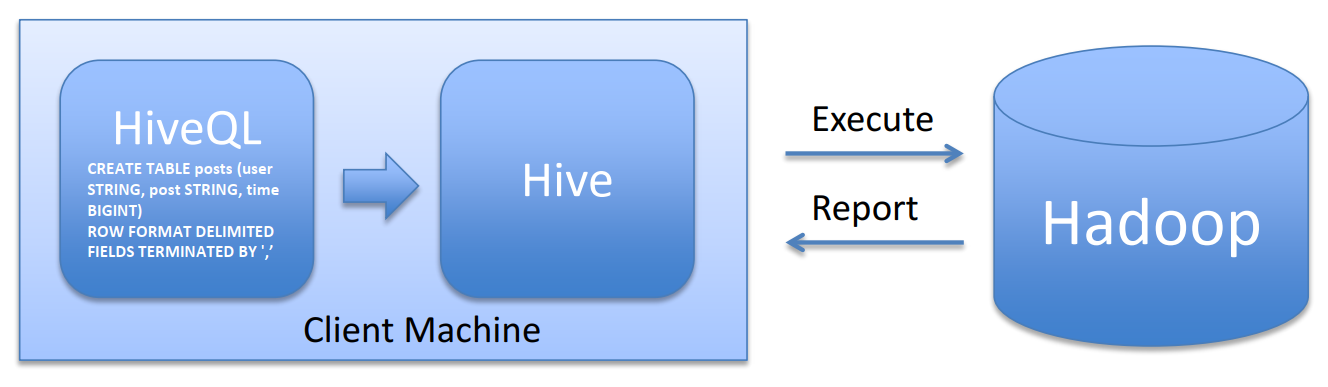

### Hive

- Для підтримки можливостей типу схеми або партиціонування даних Hive зберігає метаінформацію у реляційній БД
    - Постачається з Derby, "легкою" вбудованою SQL DB
        - Derby за замовчанням добре підходить для тестування
        
        - Схема даних не розподіляється між користувачами, кожен з них має свій власний інстанс Derby
        
        - Зберігає дані в директорії *metastore_db*, яка знаходиться в директорії, звідки був запущений Hive

    - Можна відносно легко перейти на другу БД, наприклад, MySQL

### 2. Архітектура Hive

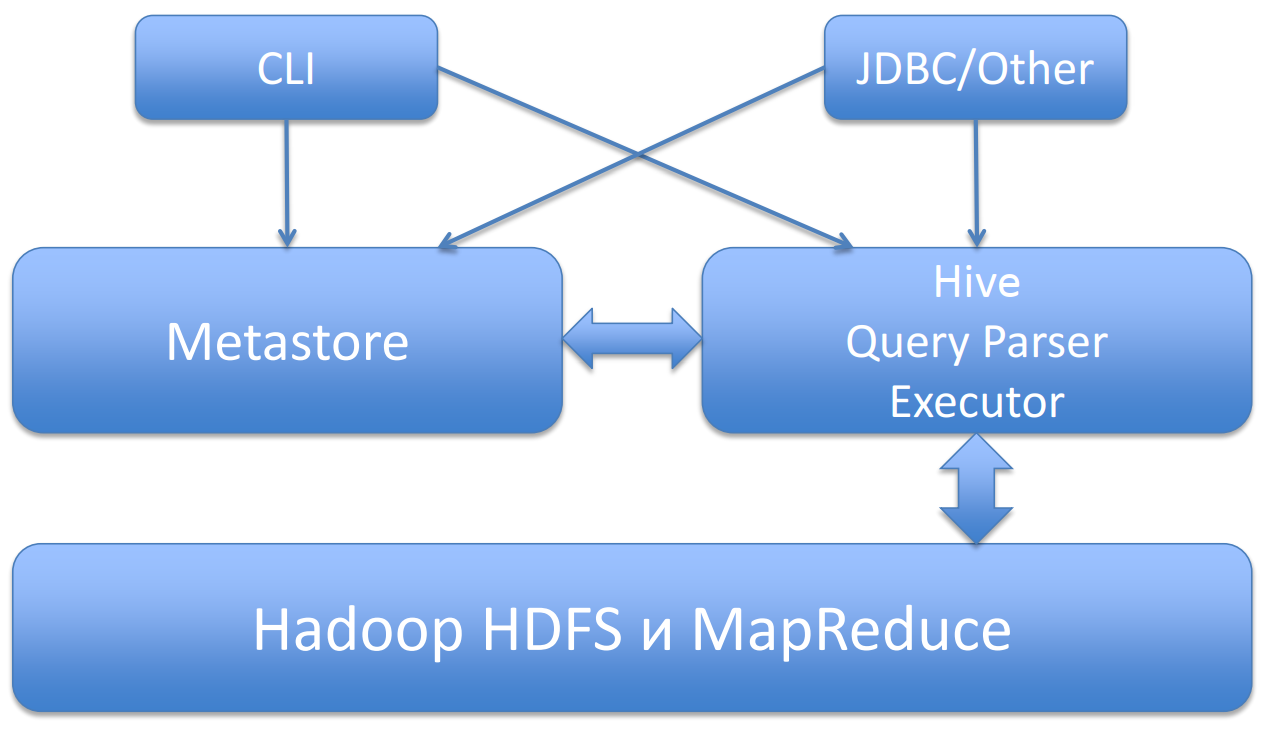

### 3. Hive Інтерфейс

- Command Line Interface (CLI)

- Hive Web Interface
    - https://cwiki.apache.org/confluence/display/Hive/HiveWebInterface

- Java Database Connectivity (JDBC)
    - https://cwiki.apache.org/confluence/display/Hive/HiveClient

### 4. Концепція Hive

- Запозичена з реляційних БД
    - **Database**: Набір таблиць для вирішення конфлікту імен

    - **Table**: Набір рядків (*rows*), які мають одну схему (для стовпців)

    - **Row**: Запис, набір стовпців

    - **Column**: Відображає тип та значення елемента
    
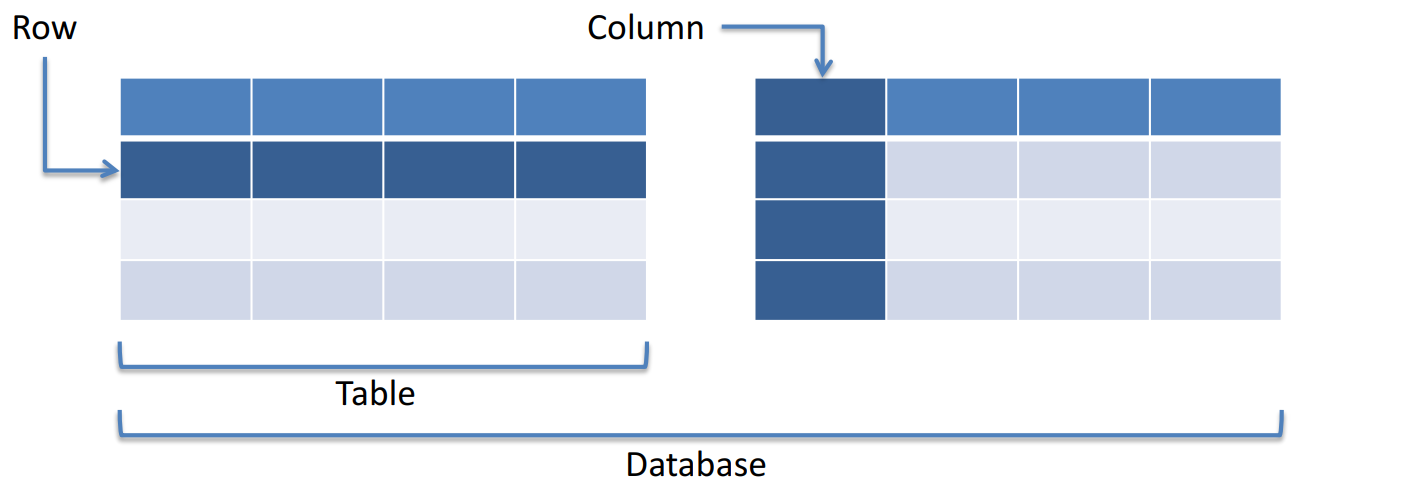

### 5. Hive: приклади

- Створити таблицю

- Завантажити дані в таблицю

- Зробити запит

- Видалити таблицю

### Hive: Створення таблиці

- Завантажити дані з файла *data/user-posts.txt*

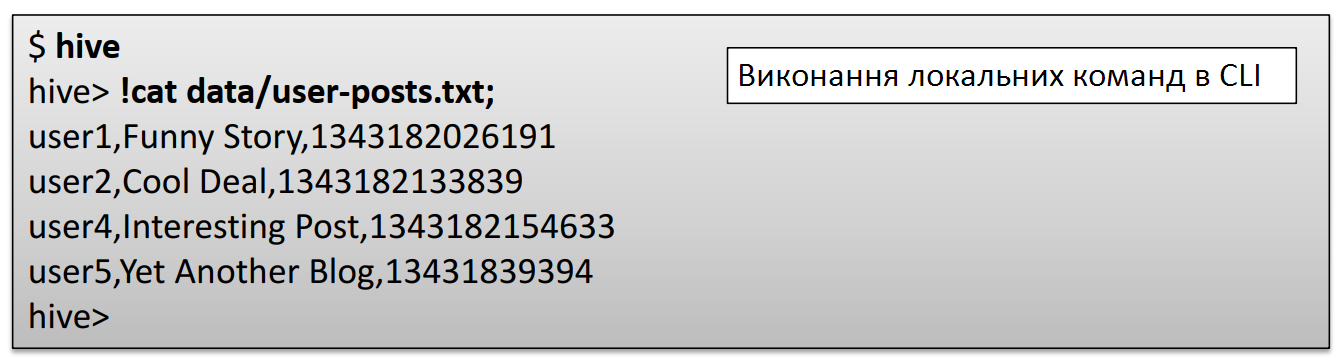

### Hive: Створення таблиці

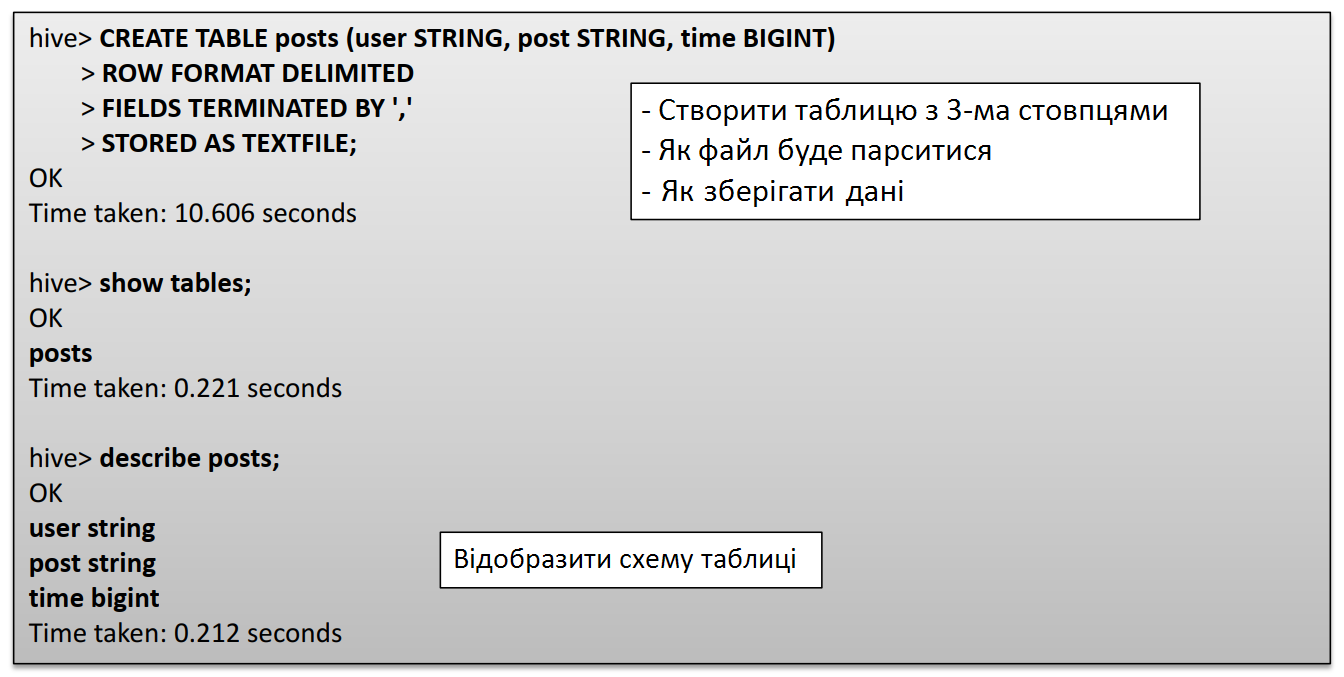

### Hive: Завантаження даних

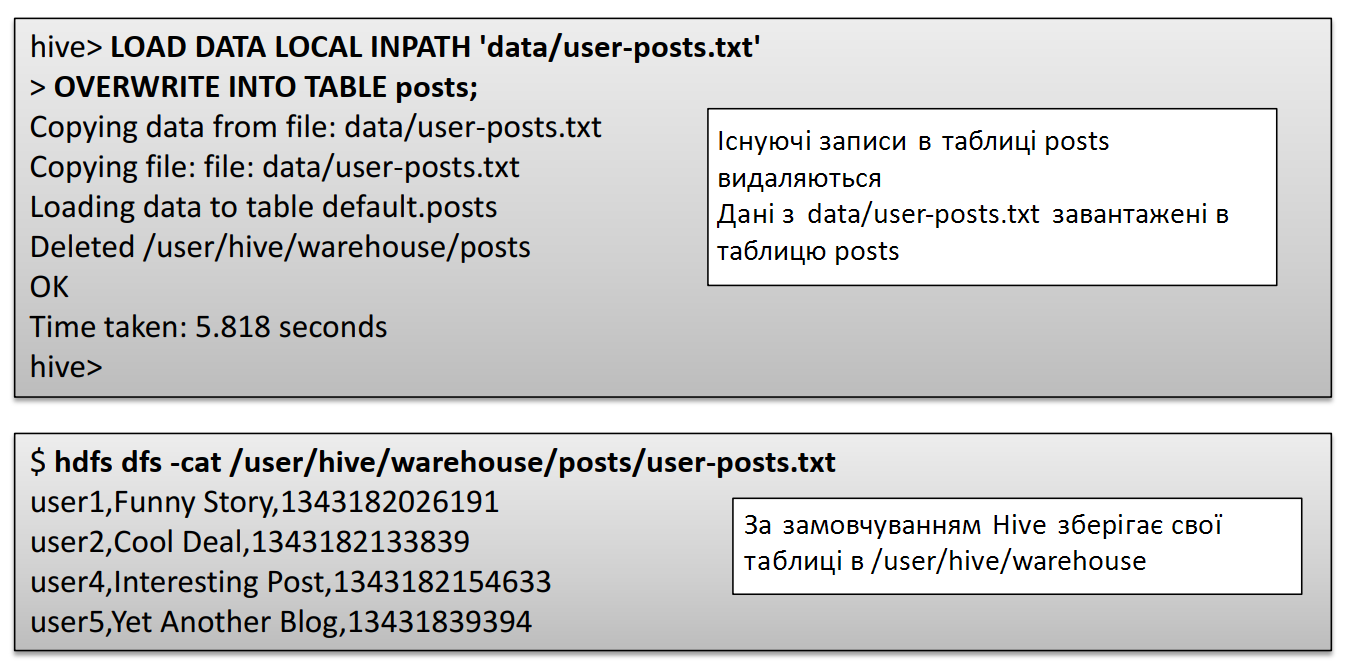

### Hive: Виконання запиту

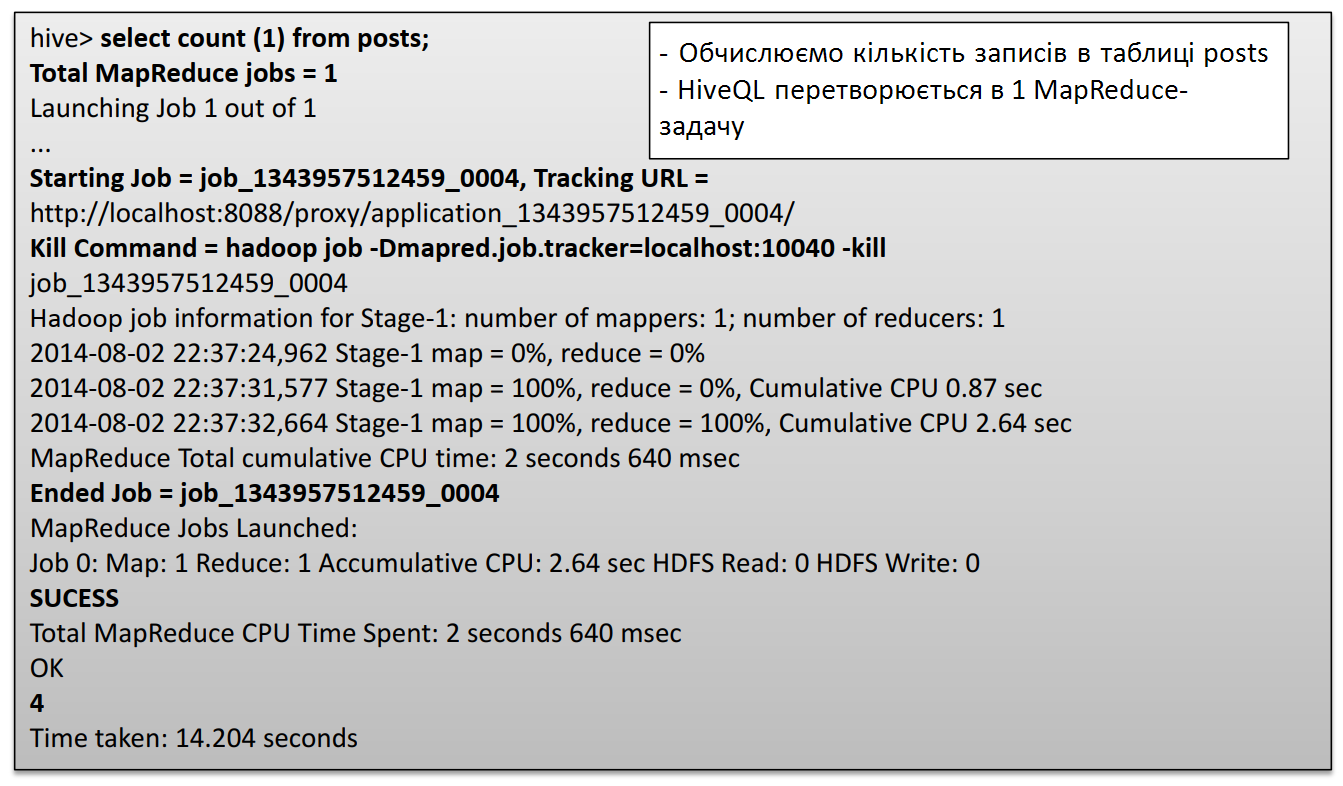

### Hive: Виконання запиту

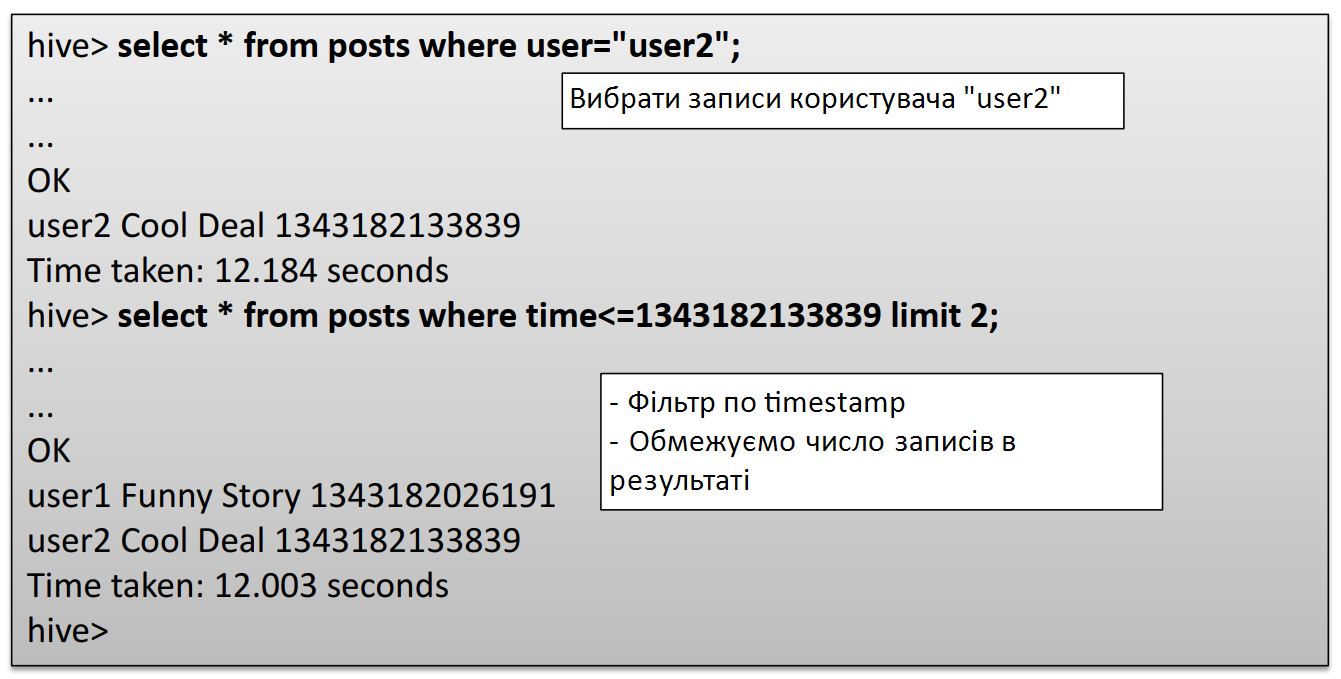

### Hive: Видалення таблиці

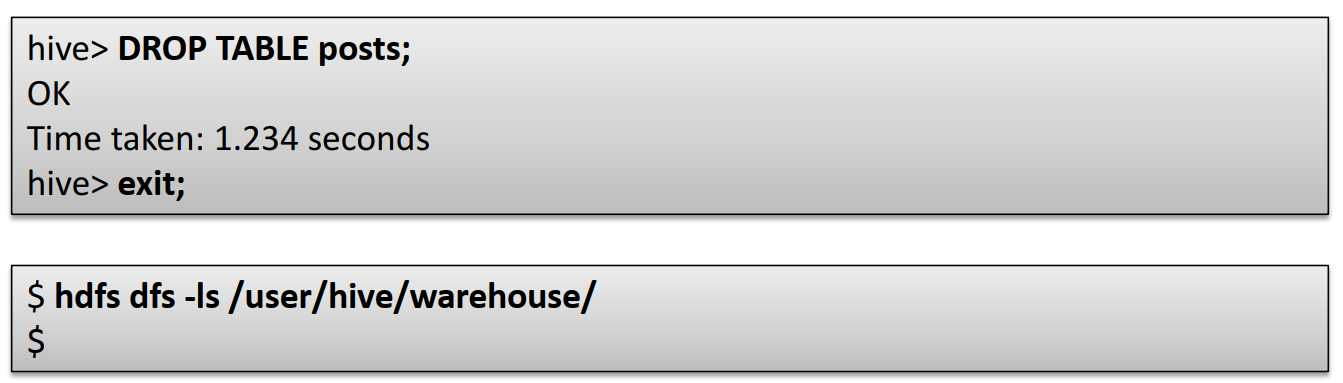

### Hive: Порушення схеми

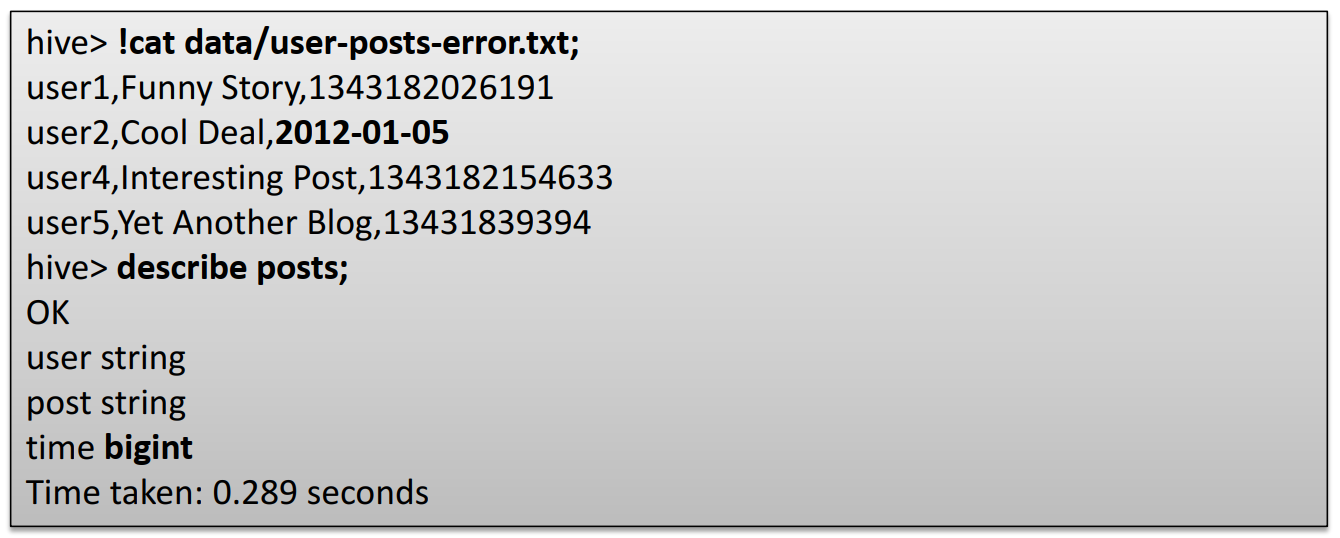

### Hive: Порушення схеми

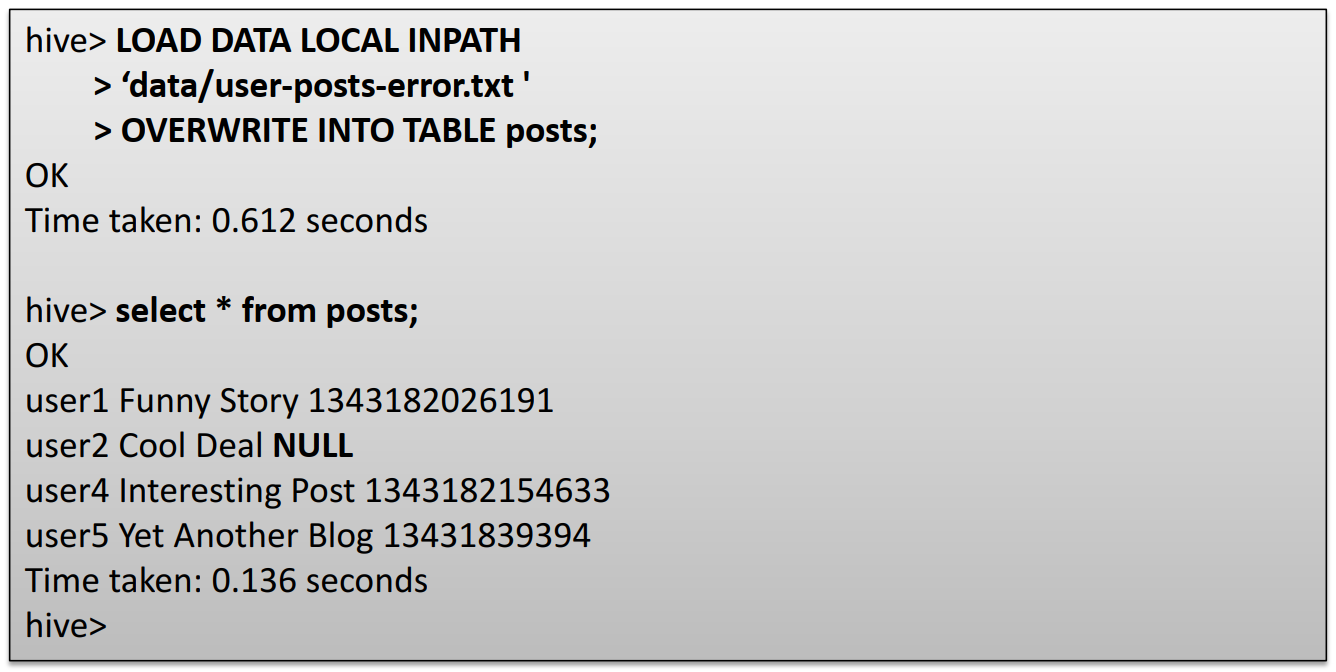

### Hive: Joins

- Використовувати **joins** в Hive просто

- Підтримка **outer joins**
    - left, right та full joins

- Можна об'єднувати багато таблиць

- За замовчуванням використовується **Inner Join**
    - Об'єднуються рядки за ключами
    
    - Рядки, які не мають співпадінь, не включаються до результату

### Hive: Inner Join

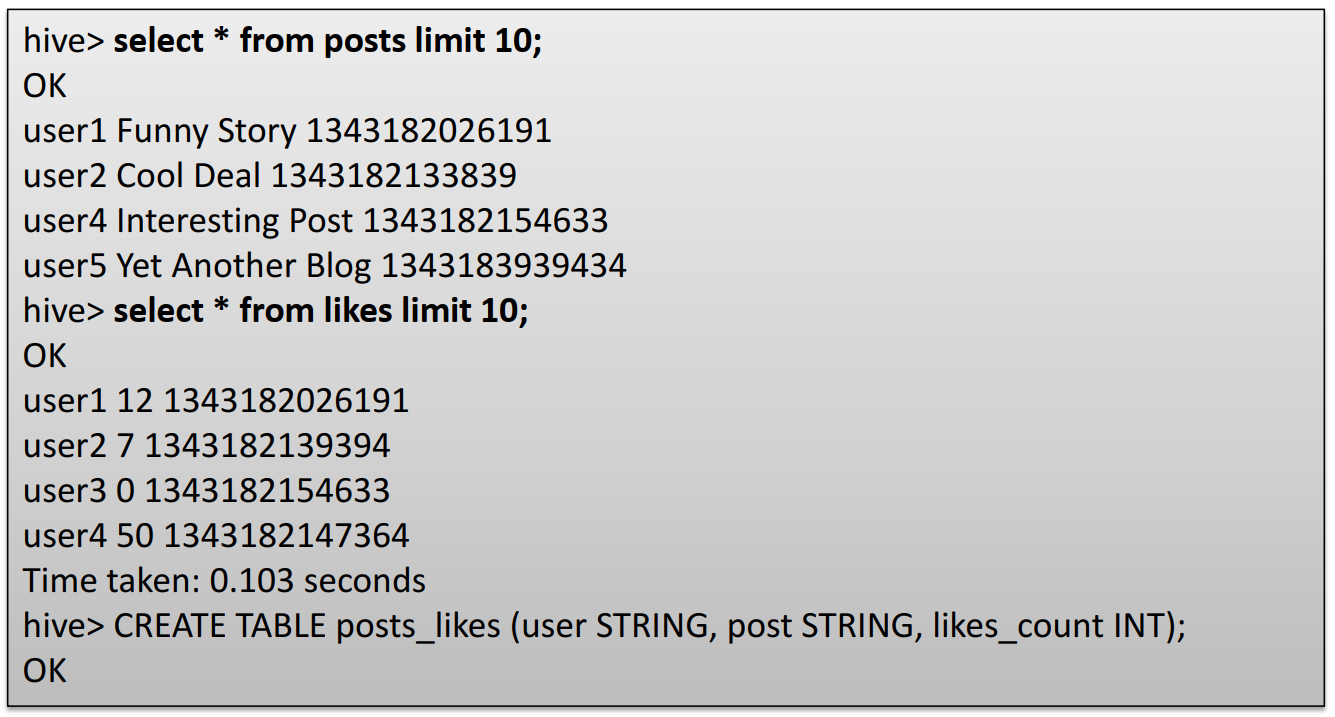

### Hive: Inner Join

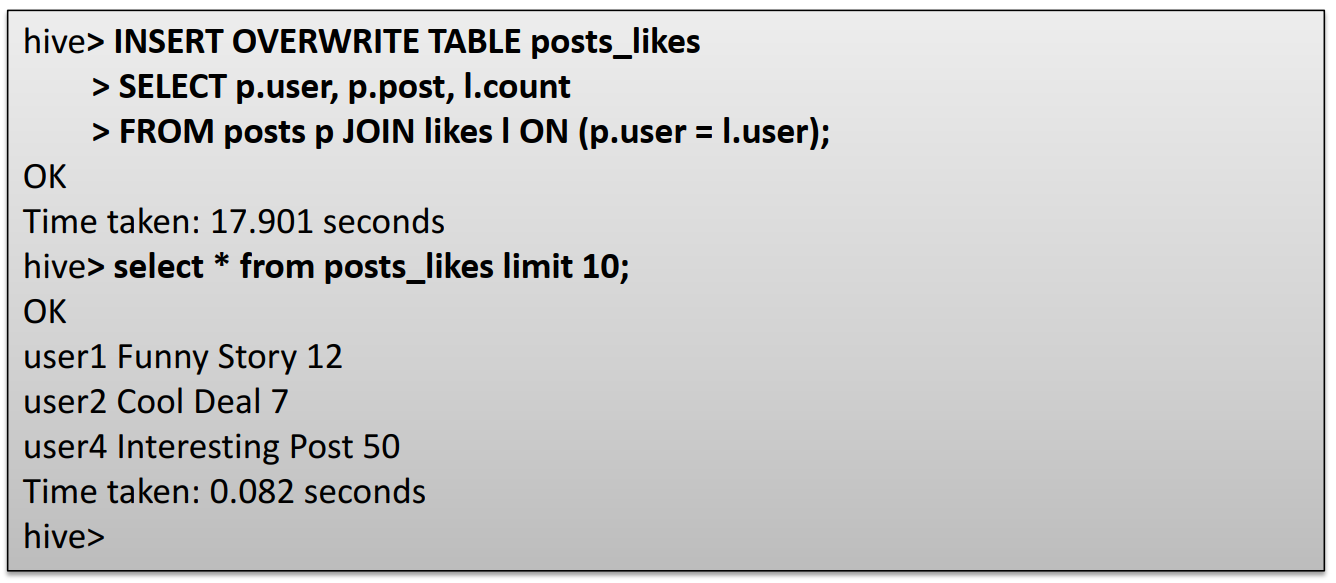

### Hive: Outer Join

- Рядки, які не мають відповідності  в "іншій" таблиці, все одно будуть включені у результат

- **Left Outer** <br>
  `SELECT p.*, l.* FROM posts p LEFT OUTER JOIN likes l ON (p.user = l.user) limit 10;`
  
  
- **Right Outer** <br>
  `SELECT p.*, l.* FROM posts p RIGHT OUTER JOIN likes l ON (p.user = l.user) limit 10;`


- **Full Outer** <br>
  `SELECT p.*, l.* FROM posts p FULL OUTER JOIN likes l ON (p.user = l.user) limit 10;`  
  
  
  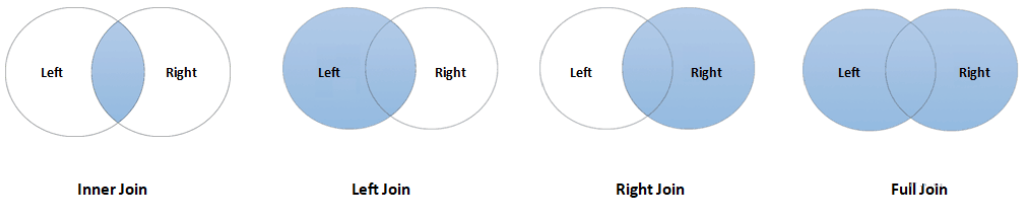

### Hive: WordCount

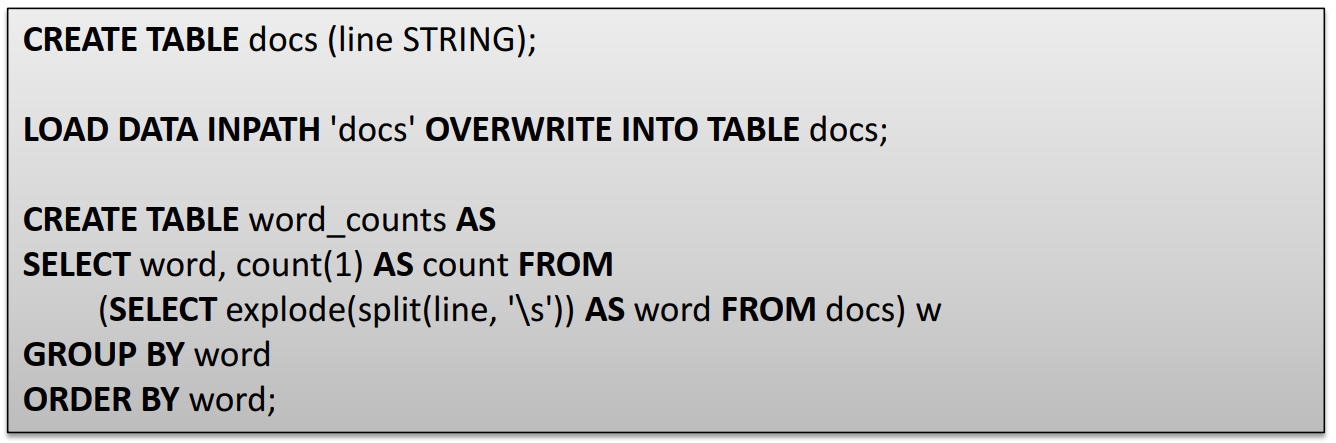

### 6. Порівняння Pig та Hive

Apache Hive — це NoSQL-сховище класу SQL-on-Hadoop, яке забезпечує доступ до даних, що зберігаються в розподіленій файловій системі Hadoop (HDFS) через стандартні SQL-запити внутрішньою декларативною мовою HiveQL. Для підключення користувачів до Hive надається інструмент командного рядка та JDBC-драйвер. Як і Pig, Hive замість написання складних MapReduce-програм на Java спрощує звернення до структурованих і напівструктурованих даних. Hive підтримує DDL та DML-запити, а також UDF-функції.

Однак, Hive використовує SQL-подібні запити HiveQL, а Pig – процедурну мову для роботи з потоками даних Pig Latin. Найчастіше Hive є інструментами дата-аналітиків та інженерів даних, а на Pig пишуть розробники застосунків. Hive трохи повільніший, ніж Pig, і працює на стороні сервера кластера HDFS. Pig працює на стороні клієнта та не підтримує ODBC/JDBC-драйвери, а також розділи в таблицях та схеми даних.

### Відмінності між Pig та Hive

| **Pig** | **Hive** |
|:---|:---|
| Працює на стороні клієнта кластера | Працює на стороні сервера кластера |
| Розробила компанія Yahoo | Розробила компанія Facebook |
| Використовує Pig Latin — мову потоків даних  | Використовує HiveQL — мову опрацювання запитів |
| Pig Latin є процедурною мовою, і вона відповідає парадигмі конвеєра | HiveQL — декларативна мова  |
| Pig може опрацьовувати структуровані, неструктуровані та напівструктуровані дані | Hive в основному використовується для обробки структурованих даних |
| Швидко завантажує дані | Повільніший за Pig |
| Не підтримує партиціонування (partitioning) та схеми даних  | Підтримує партиціонування та схеми даних |
| Не підтримує JDBC/ODBC | Підтримує JDBC/ODBC |
| На Pig пишуть розробники застосунків | Найчастіше Hive є інструментами дата-аналітиків та інженерів даних |

### Pig та Hive

- Hive підходить для невеликих та нескладних вибірок. Мова HiveQL схожа на SQL, тому можна достатньо швидко почати працювати з цим фреймворком.

- Pig вимагає вивчення мови та структур даних. Проте, розібравшись один раз, ви отримуєте потужніший інструмент, в якому легше реалізовувати складні та багатокрокові вибірки. Ви отримуєте простий та впорядкований код, з доступними та доречними коментарями.